# **TASK 3: Number Recognition**
**By- Suryansh Bajpayi**

In [1]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


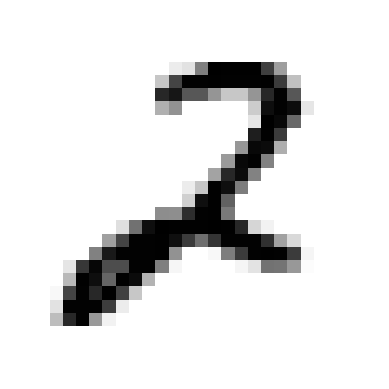

In [2]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [8]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

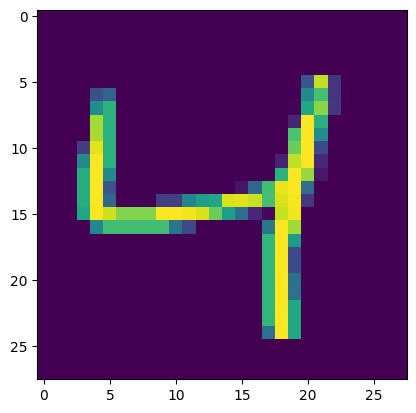

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2941 - accuracy: 0.9161 - val_loss: 0.1497 - val_accuracy: 0.9570
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1233 - accuracy: 0.9628 - val_loss: 0.1156 - val_accuracy: 0.9659
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0850 - accuracy: 0.9739 - val_loss: 0.1026 - val_accuracy: 0.9686
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.1007 - val_accuracy: 0.9702
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0939 - val_accuracy: 0.9728
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0972 - val_accuracy: 0.9707
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0977 - val_accuracy

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9773

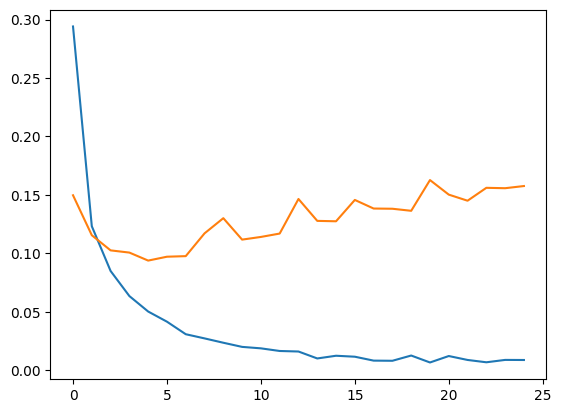

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

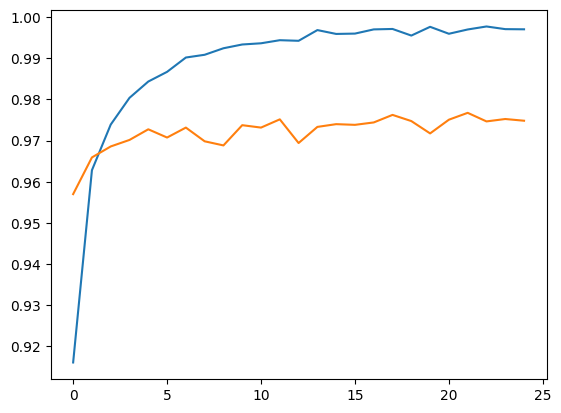

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])